<a href="https://colab.research.google.com/github/milowia/python_wagon/blob/main/Viz_02_Financial_returns_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 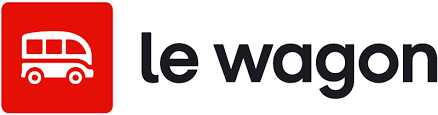

# Financial returns

Python's versatility, combined with its powerful libraries, makes it the best suited language for **financial data analysis**. 🏦🐍

In this challenge, we aim to visualize the fluctuations in share prices over time 📈📉.

## Data exploration


Execute the cell below to load financial data into a`df` variable

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


Have a look at the data types by using the `.info()`method.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           506 non-null    object 
 1   AAPL.Open      506 non-null    float64
 2   AAPL.High      506 non-null    float64
 3   AAPL.Low       506 non-null    float64
 4   AAPL.Close     506 non-null    float64
 5   AAPL.Volume    506 non-null    int64  
 6   AAPL.Adjusted  506 non-null    float64
 7   dn             506 non-null    float64
 8   mavg           506 non-null    float64
 9   up             506 non-null    float64
 10  direction      506 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 43.6+ KB


Display **statistical information** by using the appropriate function.


In [3]:
df.describe()

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up
count,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000
mean,112.935000,113.919447,111.942016,112.958340,4.317842e+07,110.459312,107.311385,112.739865,118.168345
std,11.287490,11.251892,11.263687,11.244744,1.985253e+07,10.537529,11.095804,10.595315,10.670752
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370,85.508858,94.047166,97.572721
25%,105.482500,106.349999,104.657501,105.672499,2.974240e+07,103.484803,97.011245,104.954875,111.052267
50%,112.889999,114.145001,111.800003,113.025002,3.747460e+07,110.821123,107.351628,112.799750,118.472542
75%,122.267498,123.497500,121.599998,122.179998,5.076395e+07,119.255457,114.812152,121.889416,128.515793
max,135.669998,136.270004,134.839996,135.509995,1.622063e+08,135.509995,127.289258,129.845000,138.805366


Convert the `Date` column to **datetime** format.




In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           506 non-null    datetime64[ns]
 1   AAPL.Open      506 non-null    float64       
 2   AAPL.High      506 non-null    float64       
 3   AAPL.Low       506 non-null    float64       
 4   AAPL.Close     506 non-null    float64       
 5   AAPL.Volume    506 non-null    int64         
 6   AAPL.Adjusted  506 non-null    float64       
 7   dn             506 non-null    float64       
 8   mavg           506 non-null    float64       
 9   up             506 non-null    float64       
 10  direction      506 non-null    object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 43.6+ KB


Now, we need to have a closer look at `Date` column.

Is it continuous? Or are there some missing days?

Count the number of rows per day of the week in the dataset.

<details>
    <summary>Hint 🔍</summary>

- you can extract the day of the week of a datetime object by calling the `.dayofweek`attribute.
- the `value_counts()` method can also help you (see [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html))

</details>

In [9]:
df['Date'].dt.dayofweek

,Date
0,1
1,2
2,3
3,4
4,0
...,...
501,4
502,0
503,1
504,2


What do you notice ?

> **Your Answer Here (Double click)**


Use the `.isocalendar()` method on the Date column. What type of object does it output?

In [11]:
df['Date'].dt.isocalendar()

,year,week,day
0,2015,8,2
1,2015,8,3
2,2015,8,4
3,2015,8,5
4,2015,9,1
...,...,...,...
501,2017,6,5
502,2017,7,1
503,2017,7,2
504,2017,7,3


Filter `df`on January and December Data

<details>
    <summary> Hint 🔍 </summary>

- First, you need to extract the `month` from the Date column
- Have a look at the Dataframe `.isin()`method to filter on more than one value

</details>

In [15]:
#extract the month from the Date column
df['Month'] = df['Date'].dt.month
df_jan_dec = df[df['Month'].isin([1, 12])]
df_jan_dec

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction,Month
200,2015-12-01,118.750000,118.809998,116.860001,117.339996,34852400,114.290588,112.795765,118.078000,123.360235,Decreasing,12
201,2015-12-02,117.339996,118.110001,116.080002,116.279999,33386600,113.258137,112.863291,117.806500,122.749709,Decreasing,12
202,2015-12-03,116.550003,116.790001,114.220001,115.199997,41569500,112.206202,112.900608,117.452667,122.004726,Decreasing,12
203,2015-12-04,115.290001,119.250000,115.110001,119.029999,57777000,115.936671,113.069761,117.279333,121.488905,Increasing,12
204,2015-12-07,118.980003,119.860001,117.809998,118.279999,32084200,115.206161,113.278621,117.153666,121.028712,Decreasing,12
...,...,...,...,...,...,...,...,...,...,...,...,...
489,2017-01-25,120.419998,122.099998,120.279999,121.879997,32377600,121.353858,115.170446,118.446500,121.722554,Increasing,1
490,2017-01-26,121.669998,122.440002,121.599998,121.940002,26337600,121.413604,115.123567,118.687000,122.250433,Increasing,1
491,2017-01-27,122.139999,122.349998,121.599998,121.949997,20562900,121.423555,115.190236,118.935667,122.681098,Decreasing,1
492,2017-01-30,120.930000,121.629997,120.660004,121.629997,30377500,121.104937,115.423840,119.163667,122.903493,Increasing,1


## Resampling and returns

Set the `Date`column as index.


In [16]:
df_jan_dec = df_jan_dec.set_index('Date')
df_jan_dec

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction,Month
Date,,,,,,,,,,,
2015-12-01,118.750000,118.809998,116.860001,117.339996,34852400,114.290588,112.795765,118.078000,123.360235,Decreasing,12
2015-12-02,117.339996,118.110001,116.080002,116.279999,33386600,113.258137,112.863291,117.806500,122.749709,Decreasing,12
2015-12-03,116.550003,116.790001,114.220001,115.199997,41569500,112.206202,112.900608,117.452667,122.004726,Decreasing,12
2015-12-04,115.290001,119.250000,115.110001,119.029999,57777000,115.936671,113.069761,117.279333,121.488905,Increasing,12
2015-12-07,118.980003,119.860001,117.809998,118.279999,32084200,115.206161,113.278621,117.153666,121.028712,Decreasing,12
...,...,...,...,...,...,...,...,...,...,...,...
2017-01-25,120.419998,122.099998,120.279999,121.879997,32377600,121.353858,115.170446,118.446500,121.722554,Increasing,1
2017-01-26,121.669998,122.440002,121.599998,121.940002,26337600,121.413604,115.123567,118.687000,122.250433,Increasing,1
2017-01-27,122.139999,122.349998,121.599998,121.949997,20562900,121.423555,115.190236,118.935667,122.681098,Decreasing,1


By using the **.resample()** function, compute  the `AAPL.Open` minimum value and `AAPL.Close` median value per quarter.

<details>
    <summary> Hint 🔍 </summary>

To apply more than one aggregate function,  you can use the `.agg()` method.

</details>

In [18]:
df_jan_dec.resample('QE').agg({'AAPL.Open': 'min', 'AAPL.Close': 'mean'})

,AAPL.Open,AAPL.Close
Date,,
2015-12-31,106.959999,111.726818
2016-03-31,93.790001,98.428946
2016-06-30,NaN,NaN
2016-09-30,NaN,NaN
2016-12-31,109.169998,114.335714
2017-03-31,115.800003,119.570000


Calculate the daily returns by using the `.pct_change()` method on `AAPL.Close`.


In [19]:
df_jan_dec.groupby([df_jan_dec.index.isocalendar().day])['AAPL.Close'].pct_change()

,AAPL.Close
Date,
2015-12-01,NaN
2015-12-02,NaN
2015-12-03,NaN
2015-12-04,NaN
2015-12-07,NaN
...,...
2017-01-25,0.015751
2017-01-26,0.018033
2017-01-27,0.016250


What does this line of code do ?

In [22]:
df_jan_dec.resample("QS").first()[["AAPL.Open", "AAPL.Close"]].pct_change(4)

<ipython-input-22-e2d64622caef>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_jan_dec.resample("QS").first()[["AAPL.Open", "AAPL.Close"]].pct_change(4)


,AAPL.Open,AAPL.Close
Date,,
2015-10-01,NaN,NaN
2016-01-01,NaN,NaN
2016-04-01,NaN,NaN
2016-07-01,NaN,NaN
2016-10-01,-0.070568,-0.066900
2017-01-01,0.128545,0.102515


period change compared to last quarter





Imagine the time saved in comparison with Excel! 🔥


Compute the quarterly mean evolution of the `AAPL.Close`

In [ ]:
#your code here

## Window functions

Compute the moving average of `AAPL.Close` **over the last 4 rolling days**.


In [23]:
df_jan_dec['AAPL.Close'].rolling(4).mean()

,AAPL.Close
Date,
2015-12-01,NaN
2015-12-02,NaN
2015-12-03,NaN
2015-12-04,116.962498
2015-12-07,117.197499
...,...
2017-01-25,120.482500
2017-01-26,120.967500
2017-01-27,121.434999


The `.rolling()` method allows us to specify a time window and not simply a number of previous rows. \
This is convenient to get rid of the NaN on the first rows.

Compute the moving average of `AAPL.Close` **using a sliding 30-day window**.

In [30]:
df_jan_dec["AAPL.Close"].rolling("30D").mean()


,AAPL.Close
Date,
2015-12-01,117.339996
2015-12-02,116.809998
2015-12-03,116.273331
2015-12-04,116.962498
2015-12-07,117.225998
...,...
2017-01-25,118.555000
2017-01-26,118.789000
2017-01-27,119.048500


## Missing values

We are lacking Week-end days in our dataset.

To fill the gaps in our index dates, we can use the DataFrame `.asfreq()`method. \
Have a look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html) and create a new DataFrame called `df_with_weekends` that includes the week end days.

Display the 14 first rows. What do you notice ?


In [33]:
df = df.set_index('Date')
df_with_weekends = df.asfreq('D')
df_with_weekends

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction,Month
Date,,,,,,,,,,,
2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400.0,122.905254,106.741052,117.927667,129.114281,Increasing,2.0
2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700.0,123.760965,107.842423,118.940333,130.038244,Increasing,2.0
2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400.0,123.501363,108.894245,119.889167,130.884089,Decreasing,2.0
2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400.0,124.510914,109.785449,120.763500,131.741551,Increasing,2.0
2015-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400.0,133.289993,114.820798,125.205166,135.589534,Increasing,2.0
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500.0,135.020004,115.175718,125.953499,136.731280,Increasing,2.0


We need to get rid of all the NaNs generated by the `asfreq()`function.

Have a look at the `fillna()` method [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna), and use it to replace the missing values with the **next valid value**.

⚠️ Do not reassign the value to `df_with_weekends`.


In [ ]:
df_with_weekends.fillna(method='bfill')

Another method to replace missing values is to use [interpolation](https://en.wikipedia.org/wiki/Interpolation).

Have a look at the `interpolate()` method and use it to replace the missing values. \
You can update your `df_with_weekends` variable.


In [35]:
df_with_weekends = df_with_weekends.interpolate()
df_with_weekends.head(14)

<ipython-input-35-52792185dc2c>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_with_weekends = df_with_weekends.interpolate()


,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction,Month
Date,,,,,,,,,,,
2015-02-17,127.489998,128.880005,126.919998,127.830002,6.315240e+07,122.905254,106.741052,117.927667,129.114281,Increasing,2.000000
2015-02-18,127.629997,128.779999,127.449997,128.720001,4.489170e+07,123.760965,107.842423,118.940333,130.038244,Increasing,2.000000
2015-02-19,128.479996,129.029999,128.330002,128.449997,3.736240e+07,123.501363,108.894245,119.889167,130.884089,Decreasing,2.000000
2015-02-20,128.619995,129.500000,128.050003,129.500000,4.894840e+07,124.510914,109.785449,120.763500,131.741551,Increasing,2.000000
2015-02-21,129.086665,130.666667,128.586670,130.666667,5.629030e+07,125.632634,109.981138,121.082389,132.183640,NaN,2.000000
2015-02-22,129.553334,131.833333,129.123337,131.833333,6.363220e+07,126.754354,110.176827,121.401278,132.625729,NaN,2.000000
2015-02-23,130.020004,133.000000,129.660004,133.000000,7.097410e+07,127.876074,110.372516,121.720167,133.067817,Increasing,2.000000
2015-02-24,132.940002,133.600006,131.169998,132.169998,6.922810e+07,127.078049,111.094869,122.664834,134.234798,Decreasing,2.000000
2015-02-25,131.559998,131.600006,128.149994,128.789993,7.471170e+07,123.828261,113.211918,123.629667,134.047415,Decreasing,2.000000


## Financial charts

Time to step our charting game up! 📈📉

Up to this point, we focused our efforts on Apple share only. We are now going to include shares from multiple companies, crafting the kind of essential graphs that traders need for their decisions.

**You're about to discover why Python has earned its reputation in the financial world.** 🏦


<u>Note:</u> A **ticker** is an abbreviation used to designate a specific share on a specific stock market (**eg.** *AAPL* for Apple, *TSLA* for Tesla etc.)



---




Execute the cell below to load data from multiple tickers.

Note that the values have been rebased on Day One. In other words, what you're observing is the return instead of the original ticker value.

In [36]:
df = px.data.stocks()

df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d', errors='coerce')
df = df.set_index("date")
df

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...
2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896


Display the evolution of `GOOG`  with a line plot.

In [45]:
fig = px.line(df,
    x=df.index,
    y='GOOG',
    title='evolution day by day'
)

fig.show()

Display **on the same chart** the evolution of GOOG with its minimum and maximum cumulative value.


<details>
    <summary>Hint 🔍</summary>
    
- Have a look at the `cummin()` and `cummax()` methods.
- To add a line to a Plotly chart, you can use the `.add_scatter()` method.


In [44]:
fig.add_scatter(
    x=df.index,
    y=df['GOOG'].cummin(),
    name='minimum cumulative value'
)

fig.add_scatter(
    x=df.index,
    y=df['GOOG'].cummax(),
    name='maximum cumulative value'
)

fig.show()

Display **on the same chart** the evolution of GOOG and its 10-day and 30-day moving averages.

<details>
    <summary>Hint 🔍</summary>

you might want to use the `.rolling()` method here

</details>

In [ ]:
# your code

___

We will now display returns for each ticker in separate charts.

The `pd.melt()` function can transform a wide-format table into a longer, more structured format. \
It takes variables from columns and reshapes them into rows, creating a new column for variable names and another for their corresponding values.

Run the following cell.

In [46]:
df_melt = pd.melt(df, var_name="ticker", ignore_index=False)
df_melt

,ticker,value
date,,
2018-01-01,GOOG,1.000000
2018-01-08,GOOG,1.018172
2018-01-15,GOOG,1.032008
2018-01-22,GOOG,1.066783
2018-01-29,GOOG,1.008773
...,...,...
2019-12-02,MSFT,1.720717
2019-12-09,MSFT,1.752239
2019-12-16,MSFT,1.784896


Using the `px.area()` function on the newly created DataFrame, display the returns for each ticker **in separate charts**.

<details>
    <summary> Hint 🔍 </summary>
    
A very similar example was shown in the lecture notebook.

Now might be a good time to remind yourself what `facet_col` can do!

</details>


In [47]:
fig = px.area(df_melt, x=df_melt.index, y='value', color='ticker')
fig.show()